In [179]:
library(tidyverse)

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,⋯,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,X,year
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,<lgl>,<int>
1,0,Aberfeldie,241 Buckley St,4,h,1380000,VB,Nelson,8/12/2017,7.5,⋯,766,126,1970,Moonee Valley,-37.75595,144.9055,Western Metropolitan,1543,NA,2017
2,1,Northcote,67 Charles St,2,h,1100000,SP,Jellis,5/20/2017,5.5,⋯,189,126,1970,Darebin,-37.77670,144.9924,Northern Metropolitan,11364,NA,2017
3,2,Balwyn North,42 Maud St,3,h,1480000,PI,Jellis,10/15/2016,9.2,⋯,605,116,1950,Boroondara,-37.79510,145.0696,Southern Metropolitan,7809,NA,2016
4,3,Brunswick,13 Percy St,3,h,1055000,S,Nelson,5/7/2016,5.2,⋯,324,126,1930,Moreland,-37.76530,144.9586,Northern Metropolitan,11918,NA,2016
5,4,Templestowe Lower,253 Thompsons Rd,4,h,1000000,VB,hockingstuart,8/13/2016,13.8,⋯,728,164,1970,Manningham,-37.76800,145.1027,Eastern Metropolitan,5420,NA,2016
6,5,Coburg,4/34 Gladstone St,2,u,650000,S,Barry,4/29/2017,7.8,⋯,136,81,1975,Moreland,-37.74490,144.9754,Northern Metropolitan,11204,NA,2017


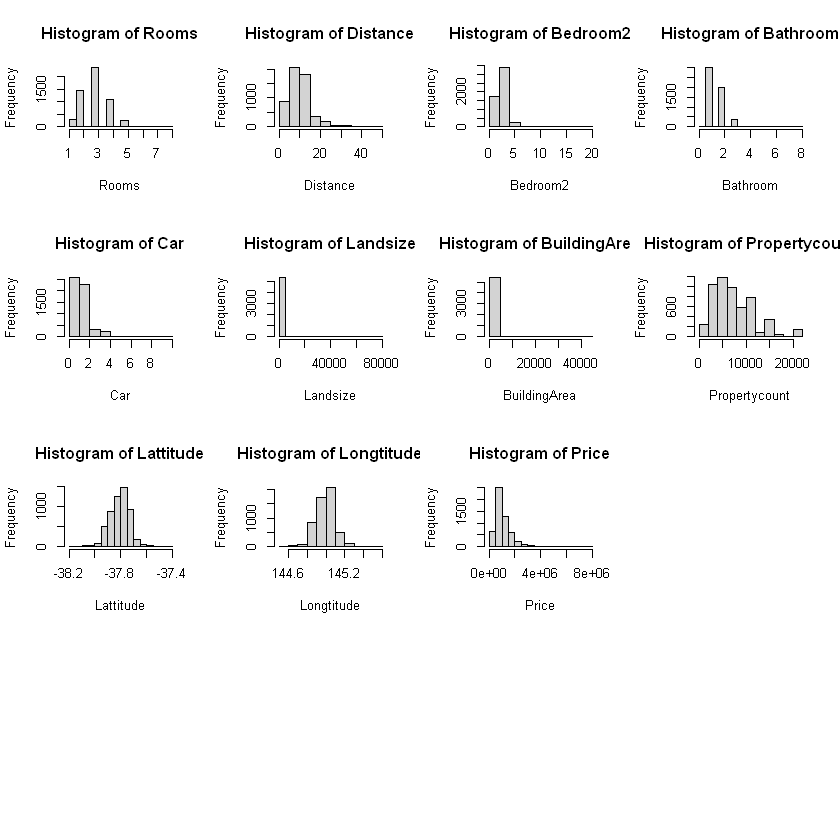

In [150]:
# Read the CSV file into a data frame
data <- read.csv("house_price_clean.csv")

# View the first few rows of the data frame
head(data)

data <- data[0:5432,]

#reorder the columns
data <-data   %>%
  select(Rooms, Distance, Bedroom2, Bathroom,Car,Landsize,BuildingArea,Propertycount,Lattitude,Longtitude,Price)


par(mfrow=c(ceiling(sqrt(ncol(data))), ceiling(sqrt(ncol(data)))))

# Loop through each column and plot its histogram
for (col in names(data)) {
  hist(data[[col]], main=paste("Histogram of", col), xlab=col)
}


# Apply log transformation to 'Rooms' column
data$Rooms <- log(data$Rooms)

# Apply log transformation to 'Distance' column
data$Distance <- log(data$Distance)

# Apply log transformation to 'Bedroom2' column
data$Bedroom2 <- log(data$Bedroom2)

# Apply log transformation to 'Bathroom' column
data$Bathroom <- log(data$Bathroom)

# Apply log transformation to 'Car' column
data$Car <- log(data$Car)

# Apply log transformation to 'Landsize' column
data$Landsize <- log(data$Landsize)

# Apply log transformation to 'BuildingArea' column
data$BuildingArea <- log(data$BuildingArea)

# Apply log transformation to 'Propertycount' column
data$Propertycount <- log(data$Propertycount)

# Apply log transformation to 'Price' column
data$Price <- log(data$Price)

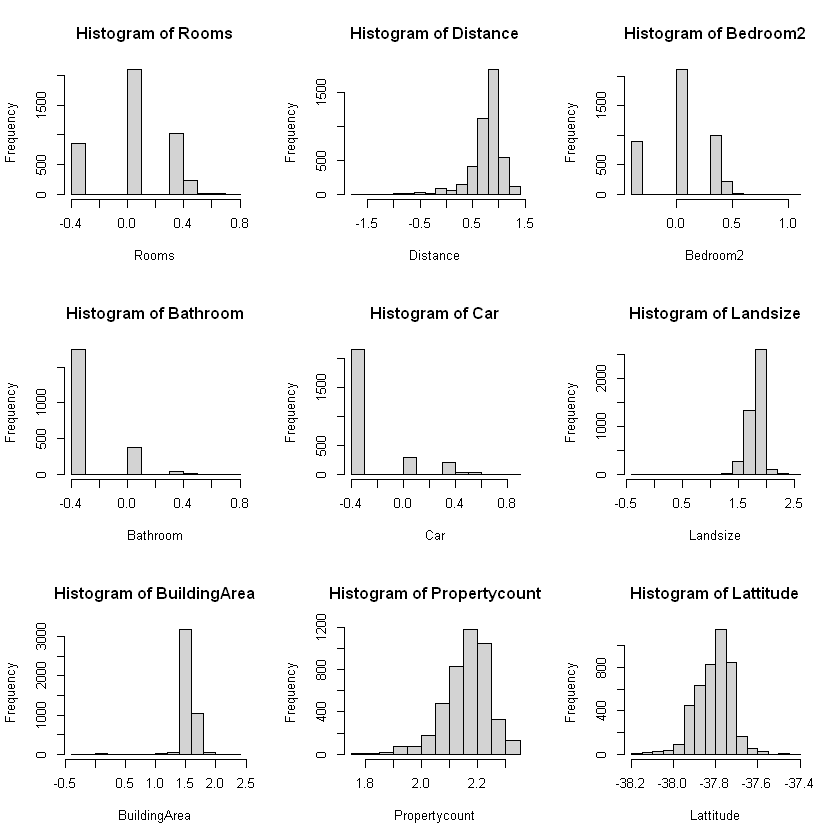

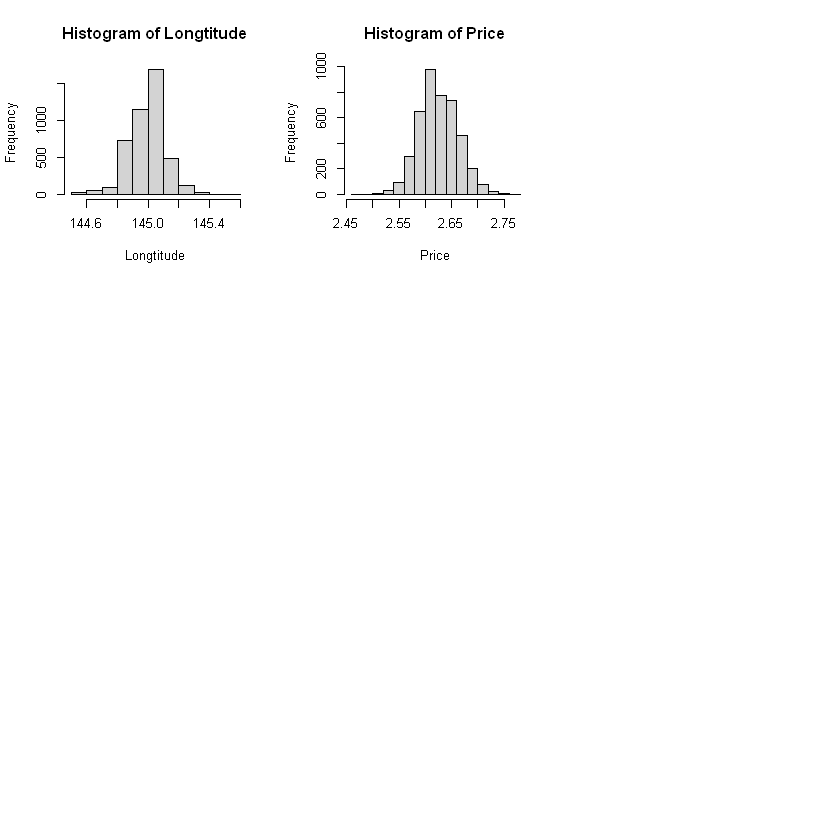

In [151]:
par(mfrow=c(ceiling(sqrt(ncol(data_2))), ceiling(sqrt(ncol(data_2)))))

# Loop through each column and plot its histogram
for (col in names(log_trans_data)) {
  hist(log_trans_data[[col]], main=paste("Histogram of", col), xlab=col)
}

In [155]:
d <- data[!apply(data, 1, function(row) any(is.infinite(row))), , drop = FALSE]

In [158]:
colnames(d)

[1] "Rooms"         "Distance"      "Bedroom2"      "Bathroom"     
 [5] "Car"           "Landsize"      "BuildingArea"  "Propertycount"
 [9] "Lattitude"     "Longtitude"    "Price"

In [161]:

mlr_model <- lm(Price ~ Rooms + Distance + Bedroom2 + Bathroom + Car + Landsize + BuildingArea + Propertycount + Lattitude + Longtitude , data = d)

mlr_model$coefficients

(Intercept)         Rooms      Distance      Bedroom2      Bathroom 
-180.44385825    0.55507969   -0.47865750    0.13419839    0.12163516 
          Car      Landsize  BuildingArea Propertycount     Lattitude 
   0.12019443    0.05135056    0.15692807   -0.00825802   -1.29690906 
   Longtitude 
   0.99621542

In [162]:
summary(mlr_model)


Call:
lm(formula = Price ~ Rooms + Distance + Bedroom2 + Bathroom + 
    Car + Landsize + BuildingArea + Propertycount + Lattitude + 
    Longtitude, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.03399 -0.20133 -0.00567  0.19580  1.52726 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.804e+02  6.451e+00 -27.973  < 2e-16 ***
Rooms          5.551e-01  5.340e-02  10.395  < 2e-16 ***
Distance      -4.787e-01  9.832e-03 -48.685  < 2e-16 ***
Bedroom2       1.342e-01  5.259e-02   2.552   0.0108 *  
Bathroom       1.216e-01  1.480e-02   8.221 2.64e-16 ***
Car            1.202e-01  1.256e-02   9.574  < 2e-16 ***
Landsize       5.135e-02  7.153e-03   7.179 8.21e-13 ***
BuildingArea   1.569e-01  1.240e-02  12.651  < 2e-16 ***
Propertycount -8.258e-03  7.602e-03  -1.086   0.2774    
Lattitude     -1.297e+00  6.298e-02 -20.592  < 2e-16 ***
Longtitude     9.962e-01  4.766e-02  20.901  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '*

### F Test

Assuming the significance level  $\alpha = 0.05 $ to determine if atleast one of the features is related to the response variable Y

In [163]:
anova(mlr_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Rooms,1,255.3490302,255.3490302,2415.061133,0.000000e+00
Distance,1,181.7381335,181.7381335,1718.857919,1.378091e-316
Bedroom2,1,2.0189265,2.0189265,19.094769,1.273052e-05
Bathroom,1,27.2680875,27.2680875,257.898369,2.056508e-56
Car,1,16.5375728,16.5375728,156.410421,2.793098e-35
Landsize,1,8.9394285,8.9394285,84.548065,5.695743e-20
BuildingArea,1,16.7944179,16.7944179,158.839632,8.589566e-36
Propertycount,1,0.5423744,0.5423744,5.129713,2.356894e-02
Lattitude,1,94.7416802,94.7416802,896.055682,4.486357e-179


$H_o = $ No Feature is related to the response variable "Price"


$H_A = $ Atleast one feature is related to the response variable "Price" 


From the results tables we can clearly see that many features has P-value less than the significance level. 






### Diagnostics

Goodnees of Fit

In [164]:
summary(mlr_model)


Call:
lm(formula = Price ~ Rooms + Distance + Bedroom2 + Bathroom + 
    Car + Landsize + BuildingArea + Propertycount + Lattitude + 
    Longtitude, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.03399 -0.20133 -0.00567  0.19580  1.52726 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.804e+02  6.451e+00 -27.973  < 2e-16 ***
Rooms          5.551e-01  5.340e-02  10.395  < 2e-16 ***
Distance      -4.787e-01  9.832e-03 -48.685  < 2e-16 ***
Bedroom2       1.342e-01  5.259e-02   2.552   0.0108 *  
Bathroom       1.216e-01  1.480e-02   8.221 2.64e-16 ***
Car            1.202e-01  1.256e-02   9.574  < 2e-16 ***
Landsize       5.135e-02  7.153e-03   7.179 8.21e-13 ***
BuildingArea   1.569e-01  1.240e-02  12.651  < 2e-16 ***
Propertycount -8.258e-03  7.602e-03  -1.086   0.2774    
Lattitude     -1.297e+00  6.298e-02 -20.592  < 2e-16 ***
Longtitude     9.962e-01  4.766e-02  20.901  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '*

The $R^2 = 0.5873 $ is low it shows that we need to work in the feature selection process by using the forward select method. 

### Forward Select

In [174]:
forward_select <- function(df, resp_str, maxk) {
  selected_features <- c() 
  other_feat <- setdiff(names(df), resp_str)
  Y <- df[[resp_str]]
  for (k in 1:maxk) {
    best_feature <- NULL
    low_sse <- Inf  
    
    for (feature in other_feat) {
      input_feature <- c(selected_features, feature)
      model <- lm(paste(resp_str, "~", paste(input_feature, collapse = " + ")), data = df)
      y_hat <- predict(model, newdata = df)
      sse <- sum((Y - y_hat)^2)
      
      if (sse < low_sse) {  
        low_sse <- sse  # Corrected variable name here
        best_feature <- feature
      }
    }
    selected_features <- c(selected_features, best_feature)
    other_feat <- setdiff(other_feat, best_feature)
    
    cat(paste("Step: ", k, " ", best_feature, " has been added.\n" ))
  }
  
  return(selected_features)
}

forward_select(d, "Price",7)

Step:  1   Rooms  has been added.
Step:  2   Distance  has been added.
Step:  3   Longtitude  has been added.
Step:  4   Lattitude  has been added.
Step:  5   BuildingArea  has been added.
Step:  6   Car  has been added.
Step:  7   Bathroom  has been added.


[1] "Rooms"        "Distance"     "Longtitude"   "Lattitude"    "BuildingArea"
[6] "Car"          "Bathroom"

In [175]:

mlr_model <- lm(Price ~ Rooms + Distance + Longtitude + Lattitude + BuildingArea + Car  + Bathroom , data = d)

mlr_model$coefficients

(Intercept)        Rooms     Distance   Longtitude    Lattitude BuildingArea 
-182.4071713    0.6972043   -0.4688085    1.0161601   -1.2769218    0.1630259 
         Car     Bathroom 
   0.1377740    0.1177239

In [176]:
summary(mlr_model)


Call:
lm(formula = Price ~ Rooms + Distance + Longtitude + Lattitude + 
    BuildingArea + Car + Bathroom, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0626 -0.2129 -0.0101  0.1985  1.5639 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.824e+02  6.450e+00 -28.278  < 2e-16 ***
Rooms         6.972e-01  2.122e-02  32.861  < 2e-16 ***
Distance     -4.688e-01  9.792e-03 -47.878  < 2e-16 ***
Longtitude    1.016e+00  4.761e-02  21.346  < 2e-16 ***
Lattitude    -1.277e+00  6.334e-02 -20.161  < 2e-16 ***
BuildingArea  1.630e-01  1.246e-02  13.084  < 2e-16 ***
Car           1.378e-01  1.242e-02  11.093  < 2e-16 ***
Bathroom      1.177e-01  1.481e-02   7.952 2.33e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3273 on 4323 degrees of freedom
Multiple R-squared:  0.5816,	Adjusted R-squared:  0.5809 
F-statistic: 858.3 on 7 and 4323 DF,  p-value: < 2.2e-16


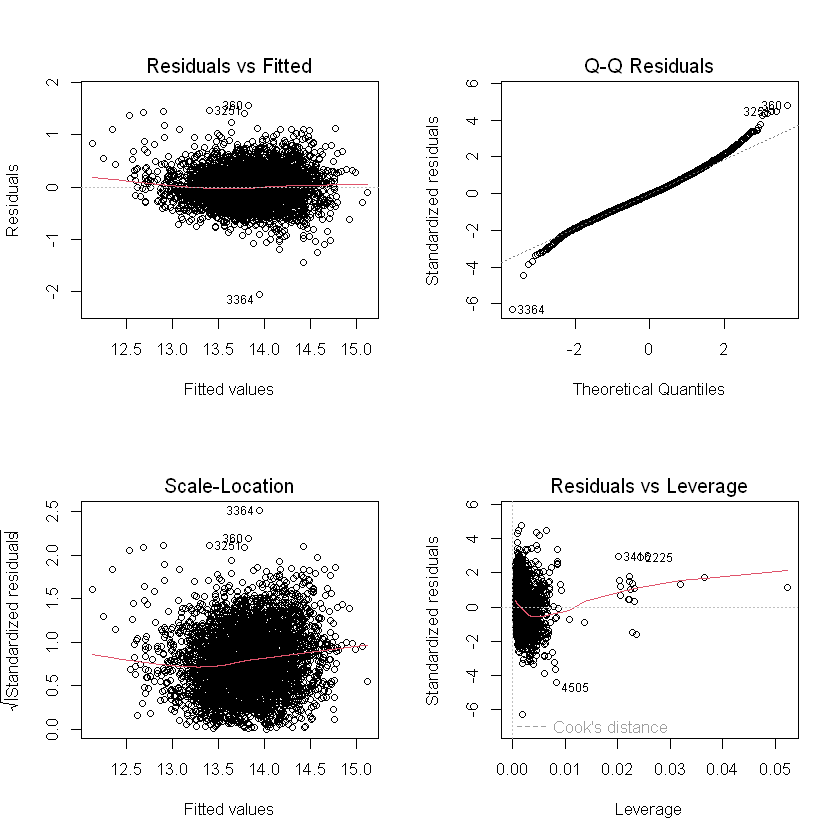

In [177]:
# gamble_df_1<- teengamb[-24, ]

# lm_gamble_1 <- lm(data = gamble_df_1 , gamble ~ sex + status + income + verbal)

diag_1 = data.frame(yhat = fitted(mlr_model), r = resid(mlr_model,type = "pearson"), y = d$Price,
                           Rooms = d$Rooms, Distance =  d$Distance , Longtitude = d$Longtitude , Lattitude = d$Lattitude , BuildingArea = d$BuildingArea , Car = d$Car , Bathroom = d$Bathroom)


par(mfrow = c(2,2))
plot(mlr_model)

Constant Variance - The variance is the constant across the overall data.
Normality - 


In [189]:
library(tidyverse)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


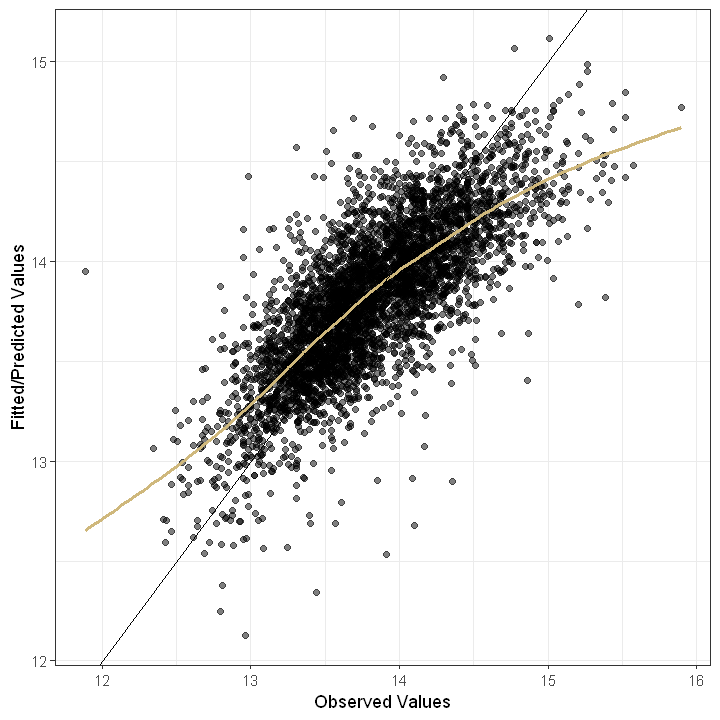

In [192]:
options(repr.plot.width = 6, repr.plot.height = 6)
ggplot(diag_1, aes(x = y, y = yhat)) + 
    geom_point(alpha = 0.5) + 
    geom_smooth(se = F, col = "#CFB87C") +
    geom_abline(intercept = 0, slope = 1)+
    xlab("Observed Values") +
    ylab("Fitted/Predicted Values") +
    theme_bw()